# Lasso, regularization and feature extraction

As reported, for example, by <a href="https://cs.nyu.edu/~roweis/csc2515-2006/readings/lasso.pdf">R.T.</a> or <a href="https://stats.stackexchange.com/q/367176">EDM</a> or <a href="https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499"> here </a>:
Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularisation, Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

Hereafter an example where N-Features/Sensors are created, but only three are correlated to the output. 

This is a regression task of supervised learning.

In [12]:
#import needed module
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [2]:
#create a function that depends only to a few inputs feature 
def true_fun(X):
    return np.expand_dims((0.5*X[:,1]+X[:,3]**2-0.1*X[:,6]),axis=-1)

#set random seed to replicate the results
np.random.seed(0)

n_samples = 20
n_sensors = 8

In [3]:
#Creation of the Dataset, input features as collected by different sensors (unnormalised_X)
#Output variable, the variable to predict is unnormalised_Y

unnormalised_X = np.random.rand(n_samples,n_sensors)
unnormalised_y = true_fun(unnormalised_X)

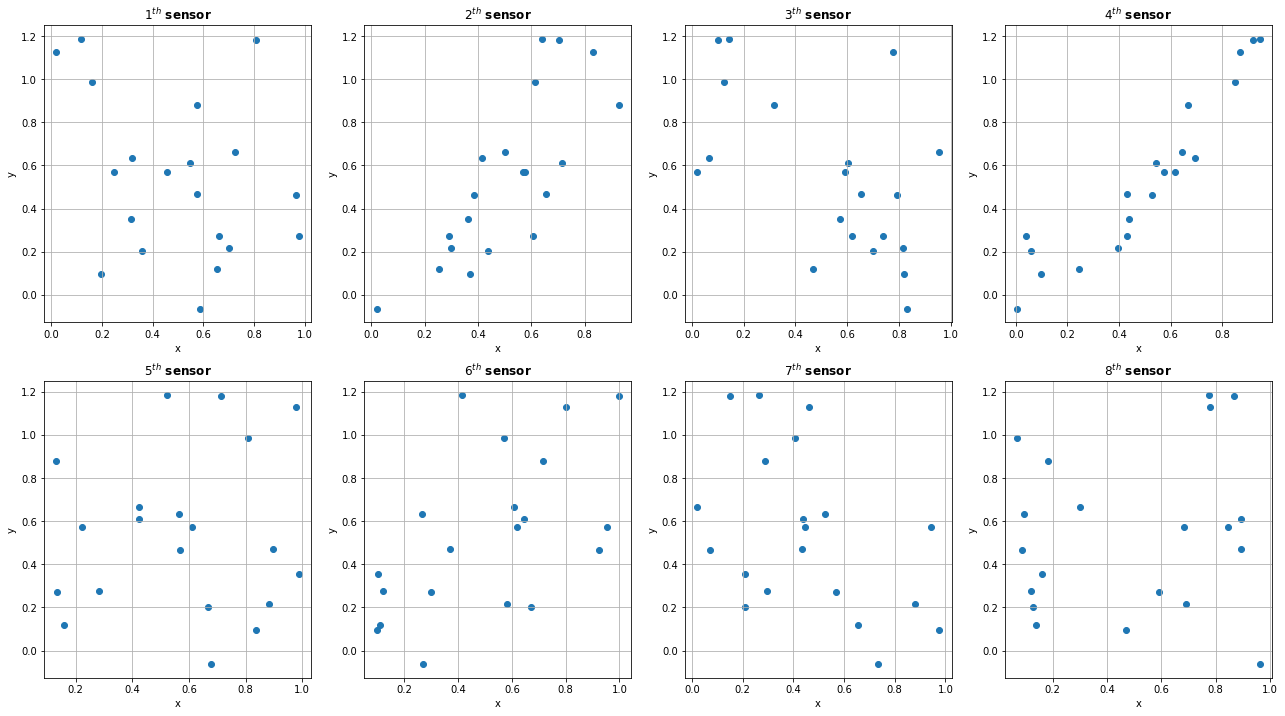

In [4]:
#Let's plot the reading of the different sensors, as function of the output variable 

fig, axs = plt.subplots(2, 4, figsize=(22,12))

a = b = 0
for i in range(n_sensors):

    if(i<4):
        a=0
        b=i
    else:
        a=1
        b=i-4
        
    axs[a,b].set_title("$%i^{th}$ sensor"%(i+1),fontweight="bold")
    axs[a,b].scatter(unnormalised_X[:,i],unnormalised_y)
    axs[a,b].set_xlabel('x')
    axs[a,b].set_ylabel('y')
    axs[a,b].grid(True)


In [5]:
#Standardisation of the inputs and output, i.e. subtracting the mean and dividing by the std-deviation. 
#it is usually a good pratice to perform standardisation, it makes the ML algorithms work better. 
scaler_X = StandardScaler().fit(unnormalised_X)
scaler_y = StandardScaler().fit(unnormalised_y)
X = scaler_X.transform(unnormalised_X)
y = scaler_y.transform(unnormalised_y)

### Generate a first Model

In [26]:
#Hyperparameter default value
first_try_alpha = 0.3
lasso_model = linear_model.Lasso(alpha=first_try_alpha)
lasso_model.fit(X,y)

#highlight in red and bold the coeff different from zero
for i,c in enumerate(lasso_model.coef_):
    text ="{}th Sensor coeff : {:.2f}".format(i+1,c)
    if(c!=0):
        text = "\033[1m"+"\033[91m"+text+"\033[0m"
    print(text)

1th Sensor coeff : -0.00
2th Sensor coeff : 0.15
3th Sensor coeff : -0.00
4th Sensor coeff : 0.54
5th Sensor coeff : 0.00
6th Sensor coeff : 0.00
7th Sensor coeff : -0.00
8th Sensor coeff : 0.00


It turns out that the feature 2 and 4 are most useful for the 

# For different alphas?

In [8]:
#to verify that the previous results is not a special outcome given the selected value for alpha,
#the hyper-parameter alpha is varied linearly and the model retrained
alphas = np.linspace(0.001,1,100)
coeffs = np.zeros([100,n_sensors])
for i,alpha in enumerate(alphas):
    lasso_model = linear_model.Lasso(alpha=alpha)
    lasso_model.fit(X,y)
    coeffs[i,:] = lasso_model.coef_
    

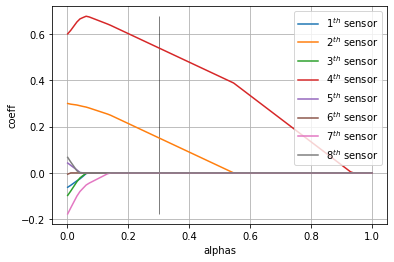

In [9]:
#Also in this case it is clearer that the most important features/sensors are for sure 2,4 and, maybe, 7. 
for s in range(n_sensors):
    plt.plot(alphas,coeffs[:,s],label="$%i^{th}$ sensor"%(s+1))
plt.legend()
plt.xlabel('alphas');plt.ylabel('coeff');plt.grid(True)
plt.vlines(first_try_alpha,np.min(coeffs),np.max(coeffs),'k',lw=0.5)

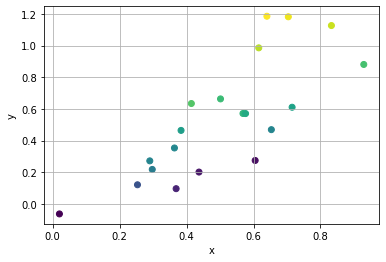

In [16]:
plt.figure()# 1,3,6
#plt.title("{}th sensor".format(i+1))
plt.scatter(unnormalised_X[:,1],unnormalised_y,c=unnormalised_X[:,3])
plt.xlabel('x');plt.ylabel('y');plt.grid(True)

In [56]:
#As example it is shown that an algorithm with L2 regularization (Ridge) 
#will not help in case of feature extraction, 
#since it does not shrink the coefficient to zero for unuseful features

Ralphas = np.linspace(0.001,1000,100)
Rcoeffs = np.zeros([100,n_sensors])
for i,alpha in enumerate(Ralphas):
    ridge_model = linear_model.Ridge(alpha=alpha)
    ridge_model.fit(X,y)
    Rcoeffs[i,:] = ridge_model.coef_

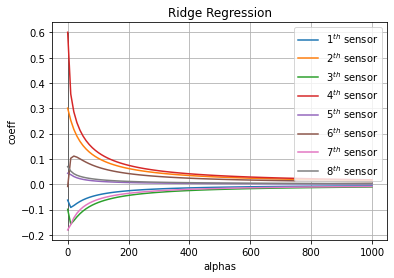

In [58]:
for s in range(n_sensors):
    plt.plot(Ralphas,Rcoeffs[:,s],label="$%i^{th}$ sensor"%(s+1))
plt.title("Ridge Regression")
plt.legend()
plt.xlabel('alphas');plt.ylabel('coeff');plt.grid(True)
plt.vlines(first_try_alpha,np.min(Rcoeffs),np.max(Rcoeffs),'k',lw=0.5)